<a href="https://colab.research.google.com/github/Kalidsa/Projeto-de-Minera-o-de-Textos---CDII/blob/main/Minera%C3%A7%C3%A3o_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo geral -  trabalho de mineração de textos


---



**Aluna: Kalidsa Oliveira**

**Curso: Engenharia de Computação**

 **Disciplina: Ciência de dados II**



---

Este trabalho tem por objetivo desenvolver e avaliar os seus conhecimentos e
habilidades em relação a aplicação das etapas do processo de KDT (Knowledge Discovery
in Texts) estudadas em aula: seleção, limpeza, transformação, mineração e
interpretação de dados. Trata-se, portanto, de um projeto de mineração de textos.

Para tanto, foram coletados 300 comentários de usuários para cada um dos
aplicativos supracitados, totalizando 3.000 comentários. Para cada comentário,
avaliadores humanos o classificaram em uma polaridade (positivo ou negativo) e em
uma emoção de acordo com as emoções básicas de Ekman e Cordaro (2011) que são:

• Felicidade: Representa uma experiência gratificante e positiva para o usuário ao usar o aplicativo;

• Surpresa: Indica uma reação inesperada e positiva do usuário durante a utilização do aplicativo;

• Tristeza: Reflete o sentimento de descontentamento ou a ausência de uma característica desejada no aplicativo, mas mantém uma apreciação geral pelo aplicativo;

• Neutro: Caracteriza a neutralidade na avaliação, com a ausência de manifestações emocionais;

• Medo: Sinaliza a presença de medo ou insegurança por parte do usuário relacionado ao uso do aplicativo;

• Nojo: Descreve uma sensação desagradável causada por uma
característica do aplicativo, prejudicando a experiência do usuário;

• Raiva: Atribuída quando há um nível notável de agressividade na
avaliação do usuário.

---
**O que você deve ser feito:**


*   BoW + NaiveBayes
*   TF-IDF + NaiveBayes
*   BoW + KNN
*   TF-IDF + KNN
*   Rede neural com embedding (Word2Vec, GloVe, Doc2Vec) (falta fazer)
*   BERTimbau (falta fazer)
*   LLama (falta fazer)

**--> Rede neural com embedding (Word2Vec, GloVe, Doc2Vec):** Pesquise, descreva o que são e escolha o que melhor se
adequar aos dados disponíveis e ao algoritmo de rede neural escolhido para PLN.

--> Representar a mesma base de comentários, utilizando o modelo TF-IDF e testar novamente a estratégia de predição usando o algoritmo NaiveBayes do código base. Repetir utilizando o algoritmo KNN.

--> Usar modelos pré-treinados avançados como o BERTimbau e o Llamma.

--> Analisar os resultados obtidos em termos de performance (precisão, revocação, medida-F e matriz de confusão).

--> Usar o método de amostragem mais adequado de acordo com o problema (holdout, cross-validation ou
estratificado). Justificar escolha!

--> Comparar as estratégias de predição em termos de performance e escolher aquela com maior performance para realizar a predição de três comentários não existentes no conjunto original de treino. Avalie qualitativamente se o comentário que você escolheu condiz com a emoção e a polaridade determinadas pelo algoritmo.




---

#Dados que devem ser analisados:



1.  **Precision:** A precisão mede a proporção de verdadeiros positivos entre todos os itens classificados como positivos pelo modelo. Em outras palavras, é a taxa de acertos do modelo para cada classe. Uma alta precisão significa que a maioria das previsões positivas são corretas.


2.  **Recall:** Mede a proporção de verdadeiros positivos entre todos os itens que realmente pertencem à classe positiva. Em outras palavras, é a capacidade do modelo de encontrar todos os itens positivos.



3.  **F1-Score:** é a média harmônica da precisão e do recall.

4.  **Support:** O número de ocorrências reais de cada classe no conjunto de teste.

5. **Accuracy:** É a métrica de avaliação usada para medir o desempenho de um modelo de classificação e representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas. Ou seja, a acurácia é a fração de instâncias corretamente classificadas entre todas as instâncias.





In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import regex
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score,precision_recall_fscore_support
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Carregamento dos dados
O código abaixo lê o arquivo CSV avaliacoes_playStore.csv em um DataFrame e exibe as primeiras cinco linhas desse DataFrame.

In [51]:
data_content = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apps_reviews.csv', sep=',')
data_content

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,Não funciona!! Reconhimento facial diz que nen...,negative,disgust,NaN
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,A experiência com o App não está sendo boa. El...,negative,disgust,NaN
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,"Não consigo logar de jeito nenhum, o código de...",negative,disgust,NaN
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,Funcionava até ultima atualização. Por algum m...,negative,disgust,NaN


In [52]:
data_content.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [53]:
data_content.loc[0, 'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

#Limpeza de dados


In [54]:
data_content.duplicated().sum()

0

In [55]:
data_content.isnull().any()

reviewId              False
app_name              False
content               False
sentiment_polarity    False
sentiment             False
Unnamed: 5             True
dtype: bool

In [56]:
data_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
 5   Unnamed: 5          1 non-null      object
dtypes: object(6)
memory usage: 141.3+ KB


In [57]:
data_content2 = pd.DataFrame(data_content)

columns_to_drop = [
    'Unnamed: 5'
]
data_content2.drop(columns=columns_to_drop, inplace=True)
data_content2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
dtypes: object(5)
memory usage: 117.7+ KB


## Pré-processamento

Remoção dos caracteres que não são latinos e colocando todas as palavras para minúsculas

In [58]:
data_content2['content'] = data_content2['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

data_content2['content'] = data_content2['content'].apply(lambda x: str(x).lower())

data_content2.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [59]:
def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

data_content2['content'] = data_content2['content'].apply(remove_stopwords)

data_content2.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Exploração de dados

Abaixo são gerados gráficos para as váriavies categóricas: sentiment e sentiment_polarity, para podermos explorar através dos histogramas a contagem desses valores separados nas suas categorias.





In [60]:
px.histogram(data_content2, x='sentiment')

In [61]:
px.histogram(data_content2, x='sentiment_polarity')

In [62]:
px.histogram(data_content2, x = 'sentiment', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [63]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [64]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment',  barmode = 'group')


# Formatação de dados

Para as colunas de sentiment_polarity e sentiment

sentiment_polarity = [negative, neutral, positive]

sentiment = [ anger, disgust, fear, happiness, neutral, sadness]


#1.  Transformando a coluna sentiment_polarity, que é ordinal, para númerica utilizando o OrdinalEncoder

In [65]:
data_content2['sentiment_polarity'].value_counts()

sentiment_polarity
negative    1742
positive    1187
neutral       82
Name: count, dtype: int64

In [66]:
sent_pol_val = data_content2['sentiment_polarity'].unique()
sent_pol_val

array(['positive', 'negative', 'neutral'], dtype=object)

In [67]:
sent_pol = {'sentiment_polarity':[sent_pol_val[0], sent_pol_val[2], sent_pol_val[1]]}

sent_pol_dtf = pd.DataFrame(sent_pol, columns=['sentiment_polarity'])
sent_pol_dtf

,sentiment_polarity
0,positive
1,neutral
2,negative


In [68]:
encoder = OrdinalEncoder(categories=[sent_pol_val])
sent_pol_dtf['sp_ordinal'] = encoder.fit_transform(sent_pol_dtf[['sentiment_polarity']])
sent_pol_dtf['sp_ordinal']  = sent_pol_dtf['sp_ordinal'].astype(int)
sent_pol_dtf

,sentiment_polarity,sp_ordinal
0,positive,0
1,neutral,2
2,negative,1


In [69]:
#dicionário criado após mapear o valor de sentiment_polarity para os valores ordinais
sent_pol_dict = dict(zip(sent_pol_dtf['sentiment_polarity'], sent_pol_dtf['sp_ordinal']))

data_content2['sp_ordinal'] = data_content2['sentiment_polarity'].map(sent_pol_dict).astype(int)

columns_to_drop = [
    'sentiment_polarity'
]
data_content2.drop(columns=columns_to_drop, inplace=True)
data_content2

,reviewId,app_name,content,sentiment,sp_ordinal
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,sadness,0
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,sadness,0
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,sadness,0
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,sadness,0
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,disgust,1
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,disgust,1
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,disgust,1
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,disgust,1
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,disgust,1


#2. Transformando a coluna sentiment, que é nominal, também para númerica utilizando OneHotEncoder

In [70]:
data_content2['sentiment'].value_counts()

sentiment
disgust      952
sadness      864
anger        743
happiness    319
neutral       82
fear          47
surprise       4
Name: count, dtype: int64

In [71]:
sent_val = data_content2['sentiment'].unique()

sent_val_dft = pd.DataFrame(sent_val, columns=['sentiment'])
sent_val_dft

,sentiment
0,sadness
1,disgust
2,happiness
3,anger
4,fear
5,surprise
6,neutral


In [72]:
sent = {'sentiment':[sent_val[0], sent_val[1],sent_val[2], sent_val[3], sent_val[4],sent_val[5], sent_val[6]]}
sent = pd.DataFrame(sent, columns=['sentiment'])

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(sent[['sentiment']]).astype(int)
sent_dft_oneHot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sentiment']))
sent_dft_oneHot

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0


In [73]:
sentiment_mapping = {sent: ''.join(map(str, one_hot)) for sent, one_hot in zip(sent_val, one_hot_encoded)}
sentiment_mapping

{'sadness': '0000010',
 'disgust': '0100000',
 'happiness': '0001000',
 'anger': '1000000',
 'fear': '0010000',
 'surprise': '0000001',
 'neutral': '0000100'}

In [74]:
sent_dft_oneHot['sentiment_binary'] = sent_dft_oneHot.apply(lambda row: ''.join(row.astype(str)), axis=1)
sent_dft_oneHot

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise,sentiment_binary
0,0,0,0,0,0,1,0,0000010
1,0,1,0,0,0,0,0,0100000
2,0,0,0,1,0,0,0,0001000
3,1,0,0,0,0,0,0,1000000
4,0,0,1,0,0,0,0,0010000
5,0,0,0,0,0,0,1,0000001
6,0,0,0,0,1,0,0,0000100


In [75]:
sentiment_mapping_dtf = pd.DataFrame({
    'sentiment': sent_val_dft['sentiment'],
    'sentiment_binary': sent_dft_oneHot['sentiment_binary'].astype(int)
})

sentiment_mapping_dtf.sort_values(by='sentiment_binary')

,sentiment,sentiment_binary
5,surprise,1
0,sadness,10
6,neutral,100
2,happiness,1000
4,fear,10000
1,disgust,100000
3,anger,1000000


In [76]:
data_content2['sentiment_binary'] = data_content2['sentiment'].map(sentiment_mapping)

columns_to_drop = [
    'sentiment'
]
data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2['sentiment_binary'] = data_content2['sentiment_binary'].astype(int)
data_content2.to_csv('/content/drive/MyDrive/Colab Notebooks/data_content2.csv', index=False)
data_content2

,reviewId,app_name,content,sp_ordinal,sentiment_binary
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,10
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,10
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,10
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,10
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,1,100000
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,1,100000
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,1,100000
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,1,100000
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,1,100000


#Extração da features (representação de texto em formato vetorial)



---

# BoW + NaiveBayes

---

* **CountVectorizer:** É uma ferramenta da biblioteca scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de palavras. Cada documento é representado por um vetor em que cada elemento é o número de vezes que uma palavra (ou token) aparece no documento.
* **fit_transform:** Ajusta o CountVectorizer aos dados textuais na coluna content do DataFrame data_content e transforma esses dados em uma matriz esparsa de contagem de palavras. Cada linha na matriz representa um documento e cada coluna representa uma palavra do vocabulário.
* **MultinomialNB:** Classificador Naive Bayes baseado em um modelo multinomial, adequado para dados de contagem ou frequência de palavras.

In [77]:
naive_bayes = MultinomialNB()
vectorizer = CountVectorizer()

In [78]:
bownb_matriz = vectorizer.fit_transform(data_content['content'])
bownb_df = pd.DataFrame(bownb_matriz.toarray(),columns=vectorizer.get_feature_names_out())
bownb_df

,00,000,00000,001,01,02,03,04,05,06,...,único,únicos,úteis,útil,ℕ𝕒,𝕒𝕔𝕙𝕖𝕚,𝕕𝕚𝕗𝕚𝕔𝕚𝕝,𝕘𝕠𝕤𝕥𝕖𝕚,𝕞𝕦𝕚𝕥𝕠,𝕦𝕤𝕒𝕣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.
As categorias serão analisadas pelas colunas sentiment e sentiment_polarity, enquanto as características são analisadas pelo BOW da coluna content.



#Para dataframe e valores originais

* **StratifiedKFold:** Método de validação cruzada estratificada que divide os dados em n_splits (4 no caso) que são divisões em 4 partes do conjunto de dados para a validação. Onde  modelo será treinado em 3 e testado em 1.
  * **shuffle=True:** Embaralha os dados antes de dividir.
  * **random_state=42:**  garante que o embaralhamento dos dados seja reprodutível. Usar um valor fixo (neste caso, 42) permite que você e outros reproduzam exatamente os mesmos folds em diferentes execuções do código.

* **cross_val_predict:** Realiza validação cruzada e retorna as previsões para cada amostra do conjunto de dados, usando o classificador naive_bayes e a configuração de validação cruzada definida por skf.
* **precision_recall_fscore_support:** Calcula precisão, recall e F1-score para cada classe, com a média macro (média das métricas para todas as classes).
* **accuracy_score:** Calcula a acurácia global do classificador.

In [79]:
txt_bownb = bownb_df
catg_bownb = data_content['sentiment']

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
predictions_dc = cross_val_predict(naive_bayes , txt_bownb, catg_bownb, cv=skf, method='predict')
precision_dc, recall_dc, f1_dc, _ = precision_recall_fscore_support(catg_bownb, predictions_dc, average='macro', zero_division=1)
accuracy_dc = accuracy_score(catg_bownb, predictions_dc)

print(classification_report(catg_bownb , predictions_dc, zero_division=1))

result_dc = {
      'Precision':f"{precision_dc:.3f}",
      'Recall': f"{recall_dc:.3f}",
      'F1-Score': f"{f1_dc:.3f}",
      'Accuracy': f"{accuracy_dc:.3f}",
}
result_dc


              precision    recall  f1-score   support

       anger       0.64      0.50      0.56       743
     disgust       0.56      0.67      0.61       952
        fear       1.00      0.00      0.00        47
   happiness       0.86      0.27      0.41       319
     neutral       0.00      0.00      1.00        82
     sadness       0.57      0.78      0.66       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.59      3011
   macro avg       0.66      0.32      0.46      3011
weighted avg       0.61      0.59      0.59      3011



{'Precision': '0.661',
 'Recall': '0.318',
 'F1-Score': '0.464',
 'Accuracy': '0.589'}

Abaixo é calculada a matriz de confusão comparando as categorias reais (catg_bownb) com as categorias previstas (predictions_dc).
A **matriz de confusão** é uma tabela que mostra o número de previsões corretas e incorretas para cada classe.

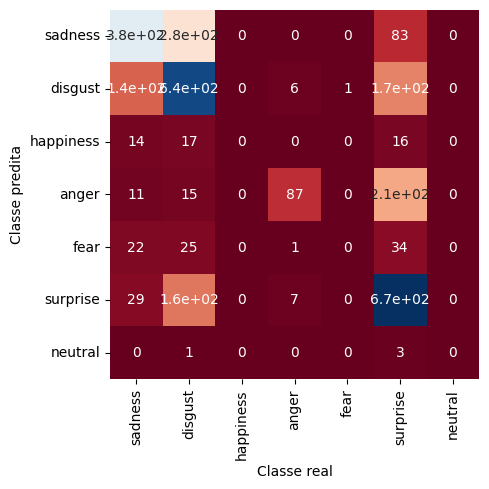

In [80]:
cm = confusion_matrix(catg_bownb, predictions_dc)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb.unique(),
            yticklabels=catg_bownb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [81]:
catg_bownb1= data_content['sentiment_polarity']

predictions_dc1 = cross_val_predict(naive_bayes , txt_bownb, catg_bownb1, cv=skf, method='predict')
precision_dc1, recall_dc1, f1_dc1, _ = precision_recall_fscore_support(catg_bownb1, predictions_dc1, average='macro', zero_division=1)
accuracy_dc1 = accuracy_score(catg_bownb1, predictions_dc1)

print(classification_report(catg_bownb1, predictions_dc1, zero_division=1))

result_dc1 = {
      'Precision':f"{precision_dc1:.3f}",
      'Recall': f"{recall_dc1:.3f}",
      'F1-Score': f"{f1_dc1:.3f}",
      'Accuracy': f"{accuracy_dc1:.3f}",
}
result_dc1

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1742
     neutral       0.00      0.00      1.00        82
    positive       0.78      0.80      0.79      1187

    accuracy                           0.82      3011
   macro avg       0.54      0.56      0.88      3011
weighted avg       0.80      0.82      0.83      3011



{'Precision': '0.542',
 'Recall': '0.557',
 'F1-Score': '0.882',
 'Accuracy': '0.818'}

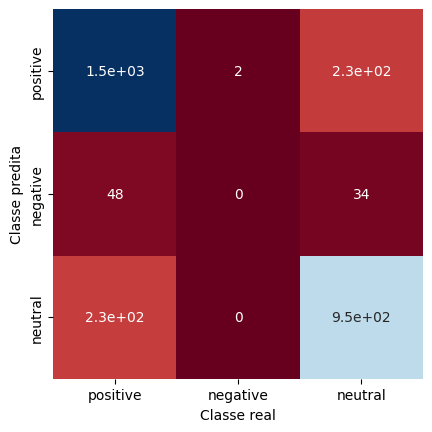

In [82]:
cm = confusion_matrix(catg_bownb1, predictions_dc1)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb1.unique(),
            yticklabels=catg_bownb1.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

---
#BoW + Naive Bayes com os dados limpos e transformados
---

In [83]:
BoW_matriz_dc_limpo = vectorizer.fit_transform(data_content2['content'])

bownb_matriz_df = pd.DataFrame(BoW_matriz_dc_limpo.toarray(),columns=vectorizer.get_feature_names_out())
bownb_matriz_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
txt_bownb_dc2 = bownb_matriz_df
catg_bownb_dc2  = data_content2['sentiment_binary']

predictions_bownb_dc = cross_val_predict(naive_bayes , txt_bownb_dc2, catg_bownb_dc2, cv=skf, method='predict')
precision_bownb_dc, recall_bownb_dc, f1_bownb_dc, _ = precision_recall_fscore_support(catg_bownb_dc2, predictions_bownb_dc, average='macro', zero_division=1)
accuracy_bownb_dc = accuracy_score(catg_bownb_dc2, predictions_bownb_dc)

print(classification_report(catg_bownb_dc2 , predictions_bownb_dc, zero_division=1))

result_bownb = {
      'Precision':f"{precision_bownb_dc:.3f}",
      'Recall': f"{recall_bownb_dc:.3f}",
      'F1-Score': f"{f1_bownb_dc:.3f}",
      'Accuracy': f"{accuracy_bownb_dc:.3f}",
}
result_bownb


              precision    recall  f1-score   support

           1       1.00      0.00      0.00         4
          10       0.58      0.76      0.66       864
         100       0.50      0.01      0.02        82
        1000       0.78      0.37      0.50       319
       10000       1.00      0.00      0.00        47
      100000       0.56      0.64      0.60       952
     1000000       0.62      0.53      0.57       743

    accuracy                           0.59      3011
   macro avg       0.72      0.33      0.34      3011
weighted avg       0.61      0.59      0.57      3011



{'Precision': '0.719',
 'Recall': '0.329',
 'F1-Score': '0.335',
 'Accuracy': '0.590'}

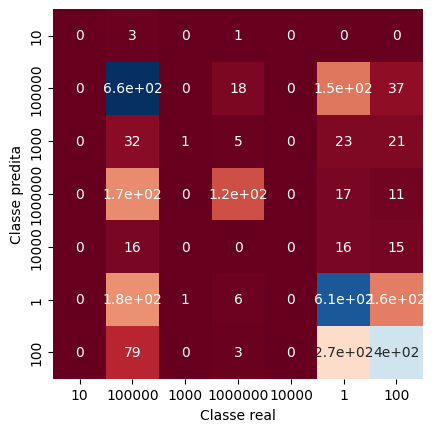

In [85]:
cm = confusion_matrix(catg_bownb_dc2, predictions_bownb_dc)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb_dc2.unique(),
            yticklabels=catg_bownb_dc2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [86]:
catg_bownb_3 = data_content2['sp_ordinal']

predictions_bownb_dc2 = cross_val_predict(naive_bayes , txt_bownb_dc2, catg_bownb_3 , cv=skf, method='predict')
precision_bownb_dc2, recall_bownb_dc2, f1_bownb_dc2, _ = precision_recall_fscore_support(catg_bownb_3 , predictions_bownb_dc2, average='macro', zero_division=1)
accuracy_bownb_dc2 = accuracy_score(catg_bownb_3 , predictions_bownb_dc2)

print(classification_report(catg_bownb_3  , predictions_bownb_dc2, zero_division=1))

result_bownb2 = {
      'Precision':f"{precision_bownb_dc2:.3f}",
      'Recall': f"{recall_bownb_dc2:.3f}",
      'F1-Score': f"{f1_bownb_dc2:.3f}",
      'Accuracy': f"{accuracy_bownb_dc2:.3f}",
}
result_bownb2

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1187
           1       0.84      0.86      0.85      1742
           2       0.25      0.01      0.02        82

    accuracy                           0.81      3011
   macro avg       0.62      0.56      0.55      3011
weighted avg       0.80      0.81      0.80      3011



{'Precision': '0.620',
 'Recall': '0.555',
 'F1-Score': '0.551',
 'Accuracy': '0.810'}

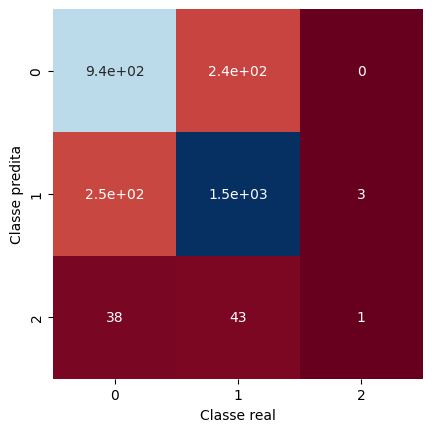

In [87]:
cm = confusion_matrix(catg_bownb_3 , predictions_bownb_dc2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb_3.unique(),
            yticklabels=catg_bownb_3.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

 # TF-IDF + Naive Bayes


---

* **TfidfVectorizer:** é uma técnica de vetorização de texto usada para representar documentos de forma numérica, levando em consideração a importância relativa de palavras em um conjunto de documentos. É uma melhoria sobre a simples contagem de palavras (bag-of-words) ao ajustar a frequência das palavras com base em sua importância no corpus, ou seja, no conjunto de textos ou documentos usados para análise, treinamento ou avaliação de modelos de linguagem.
  * **Term Frequency (TF):** Mede a frequência de uma palavra em um documento. Quanto mais a palavra aparece no documento, mais importante ela é.
  * **Inverse Document Frequency (IDF):**  Mede a importância de uma palavra em todo o corpus de documentos. A ideia é que palavras que aparecem em muitos documentos são menos importantes porque são menos discriminativas.

In [88]:
tfidf = TfidfVectorizer()

In [89]:
vectorizer_tfidf = tfidf.fit_transform(data_content2['content'])

tfidf_DataFrame = pd.DataFrame(vectorizer_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_DataFrame.head(20)

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [90]:
txt_tfidfnb = tfidf_DataFrame
categ_tfidfnb = data_content2['sentiment_binary']

predictions_tfidfnb = cross_val_predict(naive_bayes, txt_tfidfnb, categ_tfidfnb, cv=skf, method='predict')
precision_tfidfnb, recall_tfidfnb, f1_tfidfnb, _ = precision_recall_fscore_support(categ_tfidfnb , predictions_tfidfnb, average='macro', zero_division=1)
accuracy_tfidfnb = accuracy_score(categ_tfidfnb , predictions_tfidfnb)

print(classification_report(categ_tfidfnb, predictions_tfidfnb, zero_division=1))

result_tfidfnb  = {
      'Precision':f"{precision_tfidfnb :.3f}",
      'Recall': f"{recall_tfidfnb :.3f}",
      'F1-Score': f"{f1_tfidfnb :.3f}",
      'Accuracy': f"{accuracy_tfidfnb :.3f}",
}
result_tfidfnb

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         4
          10       0.52      0.74      0.61       864
         100       1.00      0.00      0.00        82
        1000       1.00      0.00      0.01       319
       10000       1.00      0.00      0.00        47
      100000       0.50      0.76      0.60       952
     1000000       0.74      0.32      0.44       743

    accuracy                           0.53      3011
   macro avg       0.82      0.26      0.24      3011
weighted avg       0.64      0.53      0.48      3011



{'Precision': '0.822',
 'Recall': '0.260',
 'F1-Score': '0.237',
 'Accuracy': '0.532'}

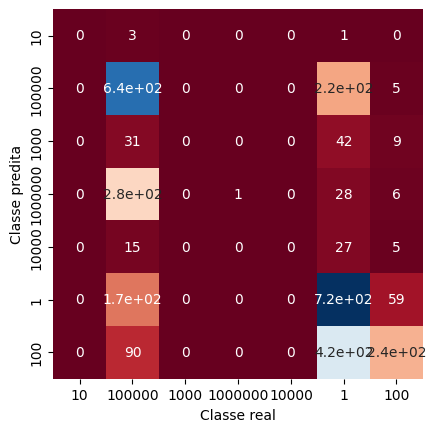

In [91]:
cm = confusion_matrix(categ_tfidfnb, predictions_tfidfnb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categ_tfidfnb.unique(),
            yticklabels=categ_tfidfnb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [92]:
categ_tfidfnb2  = data_content2['sp_ordinal']

predictions_tfidfnb2 = cross_val_predict(naive_bayes, txt_tfidfnb, categ_tfidfnb2, cv=skf, method='predict')
precision_tfidfnb2, recall_tfidfnb2, f1_tfidfnb2, _ = precision_recall_fscore_support(categ_tfidfnb2, predictions_tfidfnb2, average='macro', zero_division=1)
accuracy_tfidfnb2 = accuracy_score(categ_tfidfnb2 , predictions_tfidfnb2)

print(classification_report(categ_tfidfnb2, predictions_tfidfnb2, zero_division=1))

result_tfidfnb2  = {
      'Precision':f"{precision_tfidfnb2 :.3f}",
      'Recall': f"{recall_tfidfnb2 :.3f}",
      'F1-Score': f"{f1_tfidfnb2 :.3f}",
      'Accuracy': f"{accuracy_tfidfnb2 :.3f}",
}
result_tfidfnb2

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1187
           1       0.75      0.96      0.84      1742
           2       1.00      0.00      0.00        82

    accuracy                           0.79      3011
   macro avg       0.88      0.52      0.52      3011
weighted avg       0.81      0.79      0.77      3011



{'Precision': '0.880',
 'Recall': '0.516',
 'F1-Score': '0.517',
 'Accuracy': '0.787'}

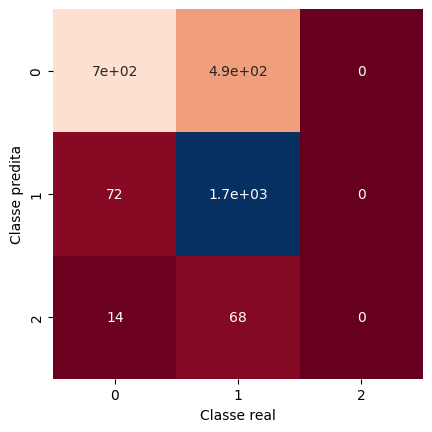

In [93]:
cm = confusion_matrix(categ_tfidfnb2, predictions_tfidfnb2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfnb2.unique(),
            yticklabels= categ_tfidfnb2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---
# BoW + KNN


---
* **KNeighborsClassifier:** é um classificador baseado em aprendizado supervisionado que usa a técnica de K-Vizinhos Mais Próximos (KNN). Ele classifica um ponto de dados com base na classe da maioria dos seus vizinhos mais próximos no espaço de características.
O parâmetro *n_neighbors* define o número de vizinhos a serem considerados na classificação.


In [94]:
knn = KNeighborsClassifier(n_neighbors=5)

In [95]:
vectorizer_bowknn = vectorizer.fit_transform(data_content2['content'])

BOWKNN_dataframe=pd.DataFrame(vectorizer_bowknn.toarray(),columns=vectorizer.get_feature_names_out())
BOWKNN_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
txt_bowknn = BOWKNN_dataframe
categ_bowknn = data_content2['sentiment_binary']

predictions_bowknn = cross_val_predict(knn, txt_bowknn, categ_bowknn, cv=skf, method='predict')
precision_bowknn, recall_bowknn, f1_bowknn, _ = precision_recall_fscore_support(categ_bowknn, predictions_bowknn, average='macro', zero_division=1)
accuracy_bowknn = accuracy_score(categ_bowknn, predictions_bowknn)

print(classification_report(categ_bowknn, predictions_bowknn, zero_division=1))

result_bowknn  = {
      'Precision':f"{precision_bowknn :.3f}",
      'Recall': f"{recall_bowknn :.3f}",
      'F1-Score': f"{f1_bowknn :.3f}",
      'Accuracy': f"{accuracy_bowknn :.3f}",
}
result_bowknn


              precision    recall  f1-score   support

           1       1.00      0.00      0.00         4
          10       0.43      0.07      0.12       864
         100       0.07      0.41      0.13        82
        1000       0.16      0.46      0.24       319
       10000       1.00      0.00      0.00        47
      100000       0.44      0.26      0.33       952
     1000000       0.37      0.47      0.42       743

    accuracy                           0.28      3011
   macro avg       0.50      0.24      0.18      3011
weighted avg       0.39      0.28      0.27      3011



{'Precision': '0.497',
 'Recall': '0.240',
 'F1-Score': '0.177',
 'Accuracy': '0.281'}

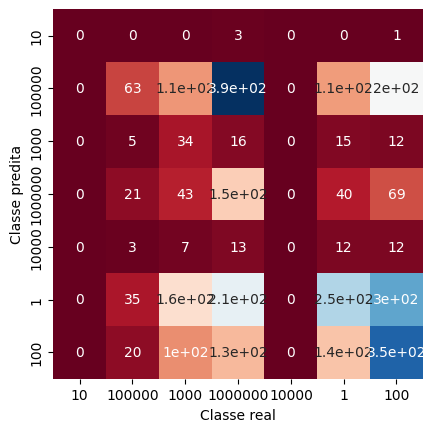

In [97]:
cm = confusion_matrix(categ_bowknn, predictions_bowknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_bowknn.unique(),
            yticklabels= categ_bowknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [98]:
categ_bowknn2 = data_content2['sp_ordinal']

predictions_bowknn2  = cross_val_predict(knn, txt_bowknn, categ_bowknn2, cv=skf, method='predict')
precision_bowknn2, recall_bowknn2, f1_bowknn2, _ = precision_recall_fscore_support(categ_bowknn2, predictions_bowknn2, average='macro', zero_division=1)
accuracy_bowknn2  = accuracy_score(categ_bowknn2, predictions_bowknn2 )

print(classification_report(categ_bowknn2, predictions_bowknn2, zero_division=1))

result_bowknn2 = {
      'Precision':f"{precision_bowknn2:.3f}",
      'Recall': f"{recall_bowknn2:.3f}",
      'F1-Score': f"{f1_bowknn2:.3f}",
      'Accuracy': f"{accuracy_bowknn2:.3f}",
}
result_bowknn2

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      1187
           1       0.68      0.73      0.71      1742
           2       0.12      0.13      0.13        82

    accuracy                           0.63      3011
   macro avg       0.46      0.46      0.46      3011
weighted avg       0.63      0.63      0.63      3011



{'Precision': '0.464',
 'Recall': '0.462',
 'F1-Score': '0.462',
 'Accuracy': '0.633'}

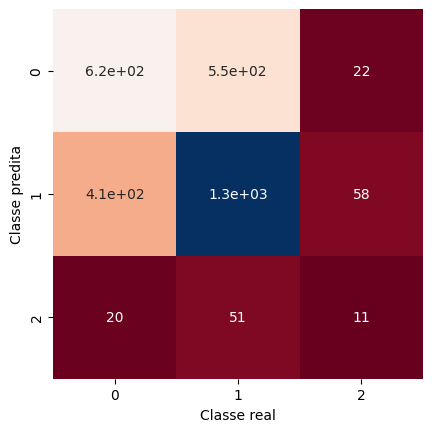

In [99]:
cm = confusion_matrix(categ_bowknn2, predictions_bowknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_bowknn2.unique(),
            yticklabels= categ_bowknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

# TF-IDF + KNN

---



In [100]:
vectorizer_tfidf_knn = tfidf.fit_transform(data_content2['content'])

tfidf_knn_dataframe = pd.DataFrame(vectorizer_tfidf_knn.toarray(), columns=tfidf.get_feature_names_out())
tfidf_knn_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
txt_tfidfknn = tfidf_knn_dataframe
categ_tfidfknn = data_content2['sentiment_binary']

predictions_tfidfknn  = cross_val_predict(knn, txt_tfidfknn, categ_tfidfknn, cv=skf, method='predict')
precision_tfidfknn, recall_tfidfknn , f1_tfidfknn, _ = precision_recall_fscore_support(categ_tfidfknn, predictions_tfidfknn, average='macro', zero_division=1)
accuracy_tfidfknn  = accuracy_score(categ_tfidfknn, predictions_tfidfknn )

print(classification_report(categ_tfidfknn, predictions_tfidfknn, zero_division=1))

result_tfidfknn = {
      'Precision':f"{precision_tfidfknn:.3f}",
      'Recall': f"{recall_tfidfknn:.3f}",
      'F1-Score': f"{f1_tfidfknn:.3f}",
      'Accuracy': f"{accuracy_tfidfknn:.3f}",
}
result_tfidfknn

              precision    recall  f1-score   support

           1       0.00      0.00      1.00         4
          10       0.50      0.57      0.53       864
         100       0.16      0.05      0.07        82
        1000       0.51      0.39      0.44       319
       10000       0.17      0.02      0.04        47
      100000       0.45      0.64      0.53       952
     1000000       0.57      0.32      0.41       743

    accuracy                           0.49      3011
   macro avg       0.34      0.28      0.43      3011
weighted avg       0.49      0.49      0.47      3011



{'Precision': '0.338',
 'Recall': '0.283',
 'F1-Score': '0.432',
 'Accuracy': '0.487'}

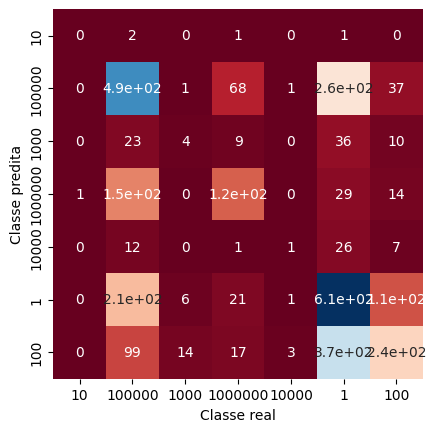

In [102]:
cm = confusion_matrix(categ_tfidfknn, predictions_tfidfknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfknn.unique(),
            yticklabels= categ_tfidfknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [103]:
categ_tfidfknn2 = data_content2['sp_ordinal']

predictions_tfidfknn2  = cross_val_predict(knn, txt_tfidfknn, categ_tfidfknn2, cv=skf, method='predict')
precision_tfidfknn2, recall_tfidfknn2 , f1_tfidfknn2, _ = precision_recall_fscore_support(categ_tfidfknn2, predictions_tfidfknn2, average='macro', zero_division=1)
accuracy_tfidfknn2  = accuracy_score(categ_tfidfknn2, predictions_tfidfknn2 )

print(classification_report(categ_tfidfknn2, predictions_tfidfknn2, zero_division=1))

result_tfidfknn2 = {
      'Precision':f"{precision_tfidfknn2:.3f}",
      'Recall': f"{recall_tfidfknn2:.3f}",
      'F1-Score': f"{f1_tfidfknn2:.3f}",
      'Accuracy': f"{accuracy_tfidfknn2:.3f}",
}
result_tfidfknn2

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      1187
           1       0.75      0.87      0.81      1742
           2       1.00      0.01      0.02        82

    accuracy                           0.75      3011
   macro avg       0.83      0.50      0.50      3011
weighted avg       0.76      0.75      0.74      3011



{'Precision': '0.834',
 'Recall': '0.504',
 'F1-Score': '0.505',
 'Accuracy': '0.752'}

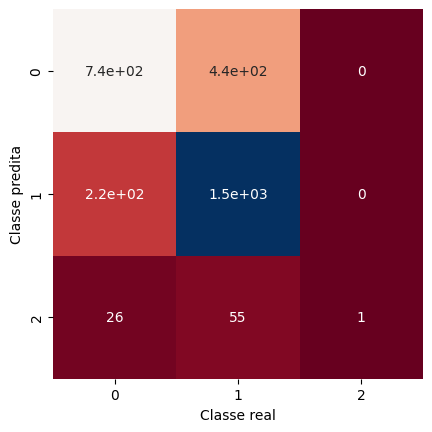

In [104]:
cm = confusion_matrix(categ_tfidfknn2, predictions_tfidfknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfknn2.unique(),
            yticklabels= categ_tfidfknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

#Rede neural com embedding

---


**O que são Embeddings?**

Embeddings são representações densas de palavras ou documentos em um espaço vetorial de baixa dimensionalidade.
Eles capturam relações semânticas entre palavras, permitindo que palavras semelhantes fiquem próximas no espaço vetorial.



1.   **Word2Vec:**

Word2Vec é uma técnica baseada em redes neurais para aprender representações de palavras.

Existem duas arquiteturas principais: Continuous Bag of Words (CBOW) e Skip-gram.

**CBOW:** Prediz uma palavra com base no contexto das palavras vizinhas.

**Skip-gram:** Prediz as palavras de contexto dado uma palavra central.

Word2Vec é treinado em grandes volumes de texto e gera embeddings que capturam semântica de maneira eficaz.

2.  **GloVe (Global Vectors for Word Representation)**

Técnica baseada em fatoração de matriz que aprende embeddings a partir da co-ocorrência global de palavras em um corpus.
Diferentemente do Word2Vec, que é baseado em janelas de contexto locais, GloVe utiliza a matriz de co-ocorrência global para aprender as representações das palavras.

GloVe é conhecido por gerar embeddings de alta qualidade que capturam relações semânticas e sintáticas.

3. **Doc2Vec**

É uma extensão do Word2Vec que aprende representações vetoriais para documentos inteiros, além de palavras.

Existem duas variantes principais:

**Distributed Memory (DM):** Funciona de maneira similar ao CBOW, mas adiciona um vetor de documento ao contexto.

**Distributed Bag of Words (DBOW):** Funciona de maneira similar ao Skip-gram, mas treina um vetor de documento para predizer palavras no documento.

Doc2Vec é útil quando precisamos de embeddings para documentos, não apenas palavras.






---


#Escolhido: Word2Vec

---


Pois é ideal para capturar o significado das palavras com base no contexto imediato, o que é importante para entender a linguagem coloquial e as nuances dos comentários dos usuários. E, além de que, pode identificar relações entre palavras, o que ajuda a detectar sentimentos e emoções subjacentes em comentários de usuários.

In [105]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [106]:
data_content3 = pd.DataFrame(data_content2)
data_content3['tokens'] = data_content3['content'].apply(lambda x: word_tokenize(x.lower()))
data_content3

,reviewId,app_name,content,sp_ordinal,sentiment_binary,tokens
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,10,"[app, shopee, razoável, apesar, fácil, utiliza..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,10,"[app, bem, otimizado, fácil, visualizar, produ..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,10,"[app, bom, prático, fácil, entender, porém, al..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,10,"[aplicativo, bom, algo, chateou, bastante, fat..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,1,100000,"[app, bom, porém, tido, dificuldades, pagament..."
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,1,100000,"[funciona, reconhimento, facial, diz, nenhum, ..."
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,1,100000,"[experiência, app, sendo, boa, precisa, aprimo..."
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,1,100000,"[consigo, logar, jeito, nenhum, código, valida..."
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,1,100000,"[funcionava, ultima, atualização, algum, motiv..."


Explicando os parâmetros de Word2Vec:
 - Pode ser treinado de duas maneiras: CBOW e SKIP-GRAM
    - **CBOW (continuous bag-of-words ):**  é uma rede neural que prediz a palavra dado um contexto, sendo o contexto interpretado como uma sentença. Este modelo pode prever tanto palavras prévias como posteriores em um contexto.
    - **Skip-Gram:** desempenha uma função inversa do apresentado em CBOW, ou seja, dado uma palavra prediz calculando as palavras mais prováveis ao contexto.

*  **sg:** é 1 para o skip-gram e 0 caso utilizar o CBOW

*  **window:** O tamanho da janela especifica quantas palavras ao redor da palavra-alvo são consideradas como contexto. Ou seja, quantas palavras que será considerada antes e depois.
  * **CBOW (Continuous Bag of Words):**  a janela de contexto é usada para prever a palavra-alvo. Por exemplo, se a palavra-alvo é "ótimo" e a janela é de tamanho 5, o modelo usará as 5 palavras anteriores e as 5 palavras seguintes para prever "ótimo".

  * **Skip-gram:** a palavra-alvo é usada para prever as palavras de contexto. Se a janela é de tamanho 5, a palavra-alvo será usada para prever as 5 palavras anteriores e as 5 palavras seguintes.

* **vector-size:** tamanho do vetor de palavras com valor de 300, esse valor baseado aos modelos CBOW  SKIP-GRAM com 300 dimensões.

* **min-count:** Define o limite mínimo de frequência das palavras. Palavras que ocorrem com menos frequência que min_count serão ignoradas.

* **alpha e min-alpha:**  Define a taxa de aprendizado inicial e final para o treinamento.
---
 * **Taxa de Aprendizado:** controla a rapidez com que o modelo ajusta seus pesos durante o treinamento, diminuindo gradualmente, pois o ideal é começar com uma taxa alta para realizar ajustes grandes no início do treinamento e ir reduzindo para ajustes mais precisos.
---
* **build_vocab:** Constrói o vocabulário a partir das tokens fornecidos.
* **train:** Treina o modelo com os tokens fornecidos, ajustando a taxa de aprendizado ao longo do treinamento.
 * **start_alpha e end_alpha:** define a taxa de aprendizado inicial e final.
 * **total_examples=model_w2v.corpus_count:**m Indica o número total de exemplos (ou frases/sentenças) no corpus. Esse valor é usado para ajustar o treinamento com base no tamanho do corpus. model_w2v.corpus_count deve ser o número total de sentenças ou documentos no seu conjunto de dados.
  * **epochs:** Define o número de passagens completas pelo corpus durante o treinamento. Cada passagem completa é chamada de época. O treinamento será repetido por 20 épocas, onde foi identificado que até 30 os valores de validação se estabilizaram.

In [156]:
model_w2v = Word2Vec(sentences = data_content3['tokens'], sg=0, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

model_w2v.build_vocab(data_content3['tokens'], update=True)
model_w2v.train(data_content3['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=20)
model_w2v.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v.txt', binary=False)

In [157]:
model = model_w2v.wv.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v.txt', binary=False)

word_vector = model['bom']
print(word_vector)

[-0.33318657  0.03889087 -0.24945231 -0.11151184  0.527321   -0.1813186
  0.3998533   0.6139382  -0.08957559 -0.0767185   0.8597022  -0.3838737
 -0.2225019   0.40088186  0.09710239  0.2209045   0.48284557 -0.8174833
  0.44088662 -0.07707903  0.22146985  0.08688807  0.14810912 -0.20732826
  0.1887134   0.30705175 -0.13803326  0.32620224  0.08047321 -0.26678643
  0.39848068 -0.4587034   0.4822285   0.18644226 -0.508356    0.2198454
  0.08840943 -0.73798823  0.11136782  0.26365808 -0.10183079  0.16619703
 -0.33515233 -0.1037102  -0.34334734 -0.18889695  0.16038544  0.37116644
  0.19173202  0.42676193  0.5013811   0.17020716 -0.5021206   1.0230044
  0.04049933  0.52185506 -0.36144736 -0.26744568 -0.21409829  0.08978724
 -0.20748754 -0.1505799   0.12339754 -0.1326025  -0.13381284  0.00309214
  0.03153797 -0.8284032   0.16636975  0.11932573  0.4815174   0.6661997
 -0.19391276 -0.38908672 -0.50875217 -0.25772247 -0.00558833 -0.02096104
 -0.19391853 -0.11092623  0.20660089 -0.1624771   0.23894

In [110]:
model.most_similar('bom')

[('ótimo', 0.6815099120140076),
 ('perfeito', 0.5628804564476013),
 ('maravilhoso', 0.5618857145309448),
 ('otimo', 0.5289682149887085),
 ('legal', 0.4919353127479553),
 ('excelente', 0.4703497588634491),
 ('virar', 0.46260976791381836),
 ('bastante', 0.45450231432914734),
 ('amo', 0.4467279613018036),
 ('completo', 0.437433660030365)]

In [111]:
model.most_similar('ruim')

[('horrível', 0.508283257484436),
 ('difícil', 0.5074936151504517),
 ('complicado', 0.42652711272239685),
 ('atualiza', 0.423587828874588),
 ('antigo', 0.4104621708393097),
 ('entende', 0.40777191519737244),
 ('instável', 0.3972935378551483),
 ('gravando', 0.39700520038604736),
 ('mudando', 0.3947140574455261),
 ('falando', 0.3917004466056824)]

* **get_embedding_w2v:** é usada para calcular a média dos vetores de palavras para um conjunto de tokens (palavras) usando um modelo Word2Vec.
  * **valid_words = [word for word in tokens if word in model_w2v]** ➡  filtra as palavras da lista de tokens, mantendo apenas aquelas que estão presentes no vocabulário do modelo Word2Vec (model_w2v).
  * **np.mean([model_w2v[word] for word in valid_words], axis=0)** ➡ se houver palavras válidas, calcula-se a média dos vetores dessas palavras. A média é calculada ao longo do eixo 0, resultando em um vetor de mesma dimensão que os vetores de palavras.

In [158]:
tokens = data_content3['tokens']

def get_embedding_w2v(tokens, model_w2v ):
    valid_words = [word for word in tokens if word in model]
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)
    else:
        return np.zeros(300)

data_content3['embedding_cbow'] = data_content3['tokens'].apply(lambda x: get_embedding_w2v(x, model_w2v ))
data_content3.to_csv('/content/drive/MyDrive/Colab Notebooks/data_content3.csv', index=False)
data_content3.loc[0, 'embedding_cbow']

array([ 0.16369236,  0.2741672 , -0.12970254,  0.24963136, -0.06009181,
       -0.2392113 ,  0.09548434,  0.11747883,  0.16135289,  0.1555206 ,
        0.14844367, -0.12145369,  0.2464761 ,  0.09693815, -0.1284177 ,
       -0.05899413,  0.15523522, -0.05537672,  0.01473841,  0.02087747,
       -0.03133912,  0.01170226,  0.08456079, -0.1035559 ,  0.2949955 ,
       -0.18007533, -0.07566806,  0.02463171, -0.25624663, -0.10169765,
        0.02470434, -0.06621937, -0.1224198 ,  0.03877469,  0.01708869,
       -0.00539949, -0.00635342, -0.0397117 ,  0.0363459 , -0.07438495,
        0.03517943,  0.00643259, -0.0755503 ,  0.08738535,  0.07922665,
        0.17515604,  0.16537444, -0.06844334, -0.09053802, -0.01533871,
       -0.08178706,  0.12138559, -0.08836108, -0.06843058, -0.09768289,
        0.23448524, -0.02120528,  0.1073918 , -0.11753082, -0.05140328,
       -0.09454326, -0.06309043, -0.12986003,  0.29261068, -0.05735744,
        0.03885324, -0.06160707, -0.15049359,  0.01473918, -0.14

* **classifiers_result:** avalia vários classificadores usando validação cruzada estratificada, calcula métricas de desempenho (precisão, recall, F1-score e acurácia) e imprime relatórios de classificação. Além disso, retorna uma lista de dicionários com os resultados de cada classificador.

In [149]:
def classifiers_result(X, y, classifiers, skf):
    results = []
    for name, clf in classifiers.items():
        y_pred = cross_val_predict(clf, X, y, cv=skf, method='predict')

        precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro', zero_division=1)
        accuracy = accuracy_score(y, y_pred)

        result = {
            'Classifier': name,
            'Precision': f"{precision:.3f}",
            'Recall': f"{recall:.3f}",
            'F1-Score': f"{f1:.3f}",
            'Accuracy': f"{accuracy:.3f}"
        }
        results.append(result)

        print(f"{name}:")
        print(classification_report(y, y_pred, zero_division=1))
        print(f"Accuracy: {accuracy:.4f}\n")

    return results

In [150]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

In [159]:
X = np.vstack(data_content3['embedding_cbow'].values)
y = data_content3['sentiment_binary']


print("Sentiment Classification:")
results_sentiment = classifiers_result(X, y, classifiers, skf)


best_classifier_sentiment = max(results_sentiment, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best Sentiment Classifier: {best_classifier_sentiment}\n")

results_sentiment_w2v = pd.DataFrame(results_sentiment)
results_sentiment_w2v

Sentiment Classification:
Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         4
          10       0.62      0.71      0.66       864
         100       0.35      0.09      0.14        82
        1000       0.66      0.55      0.60       319
       10000       0.00      0.00      1.00        47
      100000       0.58      0.66      0.62       952
     1000000       0.61      0.53      0.57       743

    accuracy                           0.60      3011
   macro avg       0.55      0.36      0.51      3011
weighted avg       0.59      0.60      0.61      3011

Accuracy: 0.6041

SVM:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         4
          10       0.62      0.72      0.66       864
         100       0.46      0.07      0.13        82
        1000       0.68      0.55      0.60       319
       10000       1.00      0.00      0.00        47
      10

,Classifier,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.545,0.363,0.512,0.604
1,SVM,0.708,0.362,0.369,0.607
2,KNN,0.330,0.301,0.590,0.520
3,Gaussian - Naive Bayes,0.496,0.397,0.328,0.451


In [ ]:
X1 = np.vstack(data_content3['embedding_cbow'].values)
y1 = data_content3['sp_ordinal']

print("Sentiment polarity Classification:")
results_sp = classifiers_result(X1, y1, classifiers, skf)


best_classifier_sp = max(results_sp, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sp Classifier: {best_classifier_sp}\n")

results_sp_ordinal_w2v = pd.DataFrame(results_sp)
results_sp_ordinal_w2v


---
# Word2Vec utilizando o algoritmo Skip-gram

---


In [ ]:
model_w2v_sg = Word2Vec(sentences = data_content3['tokens'], sg=1, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

model_w2v_sg.build_vocab(data_content3['tokens'], update=True)
model_w2v_sg.train(data_content3['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=30)
model_w2v.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v_sg.txt', binary=False)

In [ ]:
model_w2v_sg.wv.most_similar('bom')

In [ ]:
model_w2v_sg.wv.most_similar('ruim')

In [ ]:
data_content3['embedding_sg'] = data_content3['tokens'].apply(lambda x: get_embedding_w2v(x, model_w2v ))
data_content3.to_csv('data_content3.csv', index=False)
data_content3.loc[0, 'embedding_sg']

X_sg = np.vstack(data_content3['embedding_sg'].values)
y_sg = data_content3['sentiment_binary']

print("Sentiment Classification Skip-Gram:")
results_sentiment_sg = classifiers_result(X_sg , y_sg , classifiers, skf)


best_classifier_sentiment_sg = max(results_sentiment_sg, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sentiment_sg Classifier: {best_classifier_sentiment_sg}\n")

results_sentiment_sg_w2v = pd.DataFrame(results_sentiment_sg)
results_sentiment_sg_w2v

In [ ]:
X_sg1 = np.vstack(data_content3['embedding_sg'].values)
y_sg1 = data_content3['sp_ordinal']

print("Sentiment Classification Skip-Gram:")
results_sp_sg = classifiers_result(X_sg1, y_sg1, classifiers, skf)


best_classifier_sp_sg = max(results_sp_sg, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sp Classifier: {best_classifier_sp_sg}\n")

results_sp_sg_w2v = pd.DataFrame(results_sp_sg)
results_sp_sg_w2v



---
#BERTimbau

---

 O modelo utilizado é o **neuralmind/bert-base-portuguese-cased**, que é um modelo BERT treinado com dados em português.

* **AutoTokenizer:** Carrega o tokenizador associado ao modelo BERT pré-treinado. O tokenizador converte o texto em tokens.

* **AutoModel:** Carrega o modelo BERT pré-treinado para codificar os textos.

* **word_embedding_model:** Cria um modelo de embeddings baseado no Transformer. Este modelo é responsável por gerar embeddings (representações vetoriais) para as palavras ou frases. Utiliza o modelo BERT que foi carregado anteriormente.

* **pooling_model:** Cria um modelo de pooling que transforma a sequência de embeddings em um único vetor de representação. O pooling combina as representações das palavras geradas pelo word_embedding_model em uma única representação para a frase. O get_word_embedding_dimension() fornece a dimensão dos embeddings que o pooling deve considerar.

* **SentenceTransformer:** este modelo é projetado para gerar embeddings para frases completas.

 Motivos da escolha do modelo neuralmind/bert-base-portuguese-cased:

   * Este modelo foi treinado especificamente em textos em português. Isso significa que ele é otimizado para compreender e gerar representações para o idioma português, capturando nuances linguísticas e contextuais que são específicas para o idioma.
  
   * Modelos treinados em um idioma específico geralmente lidam melhor com as particularidades gramaticais, sintáticas e semânticas desse idioma.
  
  * O BERT (Bidirectional Encoder Representations from Transformers) é um modelo que considera o contexto de uma palavra tanto à esquerda quanto à direita para criar embeddings contextuais. Isso melhora a compreensão do significado das palavras em diferentes contextos.
  
  * Cased: O modelo cased preserva a capitalização das palavras, o que é importante para idiomas como o português, onde a capitalização pode mudar o significado ou a gramática (por exemplo, "Banco" vs. "banco").
  
  *  Modelos baseados em BERT têm se mostrado altamente eficazes em diversas tarefas de PLN, como análise de sentimentos, reconhecimento de entidades nomeadas, e mais. Tendo uma alta performance.

  * Modelo de Código Aberto e está disponível na Hugging Face Model Hub, o que facilita o acesso e a integração com outras ferramentas e bibliotecas de PLN.


In [ ]:
#!pip uninstall -y transformers
#!pip install transformers
#!pip install datasets

In [161]:
import os
import torch
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder

Preparação dos dados para um modelo de classificação de texto usando BERT:
  * A nova coluna stratify_col é criada combinando as colunas sentiment_binary e sp_ordinal em tuplas. Isso é útil para garantir que a estratificação durante a validação cruzada ou divisão do conjunto de dados mantenha a proporção de rótulos.

In [191]:
model_name_or_path = '/content/drive/MyDrive/Colab Notebooks/bert-base-portuguese-cased'
data_content2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_content2.csv')

label_encoder_sentiment = LabelEncoder()
ordinal_encoder_sp_ordinal = OrdinalEncoder()

data_content2['sentiment_binary'] = label_encoder_sentiment.fit_transform(data_content2['sentiment_binary'])

data_content2['sp_ordinal'] = ordinal_encoder_sp_ordinal.fit_transform(data_content2[['sp_ordinal']])
data_content2['sp_ordinal'] = data_content2['sp_ordinal'].astype(int)

data_content2['stratify_col'] = data_content2[['sentiment_binary', 'sp_ordinal']].apply(tuple, axis=1)
data_content2.head(20)


,reviewId,app_name,content,sp_ordinal,sentiment_binary,stratify_col
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,1,"(1, 0)"
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,1,"(1, 0)"
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,1,"(1, 0)"
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,1,"(1, 0)"
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,1,5,"(5, 1)"
5,2ce2db50-eec3-4cf5-afd6-b153ca01cf0f,Shopee,bom app porém fica travando pouco hora conclui...,0,3,"(3, 0)"
6,404d8ede-bf3e-4652-a410-ec1ad12e40df,Shopee,gostado bastante app acredito decorrência atua...,0,3,"(3, 0)"
7,0d7c4353-a8f6-467c-abd7-c65b26fd4976,Shopee,adoro tudo pensar promoções frete diferencial ...,0,3,"(3, 0)"
8,5410fc9e-d51f-4f6f-9fdc-01b93eed8750,Shopee,app bom algumas mercadorias realmente qualidad...,0,1,"(1, 0)"
9,31458c8f-8f11-496f-b72e-dacc9470a52f,Shopee,problema inicial conseguir enviar mensagens ch...,1,6,"(6, 1)"


* **train_test_split** para dividir o data_content2 em conjuntos de treinamento e teste. A divisão é feita com 20% dos dados reservados para teste e garante a estratificação com base na coluna stratify_col.
* São criados objetos Dataset, para serem usados para manipulação e preparação de dados em projetos com Transformers.
* tokenizer carrega um tokenizador pré-treinado para o modelo BERT a partir do diretório local, assim como o model.
* **BertForSequenceClassification:** é um modelo BERT (Bidirectional Encoder Representations from Transformers) ajustado para tarefas de classificação de sequência. Os resultados produzidos pelo modelo são logits, que representam valores para cada classe.


* **preprocess_function():** Esta função é usada em um pipeline de preparação de dados, onde os dados são carregados e passados para essa função para serem preparados antes do treinamento ou da avaliação do modelo.

* Tabém é realizada a conversão dos dados para tensores PyTorch, o que facilita a integração com o modelo BERT para treinamento e avaliação.

* **Tensores:** são uma generalização de vetores e matrizes para mais de duas dimensões e são a estrutura de dados fundamental em muitas bibliotecas de aprendizado de máquina e computação científica, como PyTorch e TensorFlow. Eles são usados para armazenar e manipular dados numéricos em várias dimensões.

In [185]:
train_df, test_df = train_test_split(data_content2, test_size=0.2, random_state=42, stratify=data_content2['stratify_col'])

train_df = train_df.rename(columns={'sentiment_binary': 'label', 'sp_ordinal': 'label1'})
test_df = test_df.rename(columns={'sentiment_binary': 'label', 'sp_ordinal': 'label1'})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


tokenizer = BertTokenizer.from_pretrained(model_name_or_path)
model = BertForSequenceClassification.from_pretrained(model_name_or_path, num_labels=len(label_encoder_sentiment.classes_))


def preprocess_function(examples):
    examples['content'] = [str(text) for text in examples['content']]
    return tokenizer(examples['content'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label', 'label1'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label', 'label1'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

In [186]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/results_bert",
    eval_strategy="epoch", #avaliação é realizada no final de cada época
    learning_rate=2e-5, #Taxa de aprendizado para o treinamento do modelo.
    per_device_train_batch_size=8, # Tamanho do lote para treinamento
    per_device_eval_batch_size=8, #Tamanho do lote para avaliação
    num_train_epochs=3,
    weight_decay=0.01, #O decaimento dos pesos é uma forma de regularização para evitar overfitting
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_bert")
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_bert")

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
def get_bert_embeddings(texts, tokenizer, model, batch_size=32, max_length=128):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        batch_texts = [str(text) for text in batch_texts]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.hidden_states[-1][:, 0, :].numpy()
        all_embeddings.extend(embeddings)
    return np.array(all_embeddings)


In [ ]:
model = BertModel.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_bert", output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_bert")


X_bert = get_bert_embeddings(data_content2['content'].tolist(), tokenizer, model)
y_sentiment = data_content2['sentiment_binary'].values
y_sp_ordinal = data_content2['sp_ordinal'].values

print("Embeddings shape:", X_bert.shape)
print("Labels shape:", y_sentiment.shape, y_sp_ordinal.shape)

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

print("Sentiment Classification:")
results_sentiment = classifiers_result(X_bert, y_sentiment, classifiers, skf)


best_classifier_sentiment = max(results_sentiment, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best Sentiment Classifier: {best_classifier_sentiment}\n")


results_sentiment_bert = pd.DataFrame(results_sentiment)
results_sentiment_bert

In [ ]:
# Avaliar classificadores para a tarefa ordinal
print("Ordinal Classification:")
results_sp_ordinal = classifiers_result(X_bert, y_sp_ordinal, classifiers, skf)

best_classifier_sp_ordinal = max(results_sp_ordinal, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best Ordinal Classifier: {best_classifier_sp_ordinal}\n")

results_sp_ordinal_bert = pd.DataFrame(results_sp_ordinal)
results_sp_ordinal_bert

---
#LLAMA
---

---
#Análise dos resultados obtidos
---

In [194]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Sentiment_binary", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR", "Word2Vec-SG - LR","Bertimbau - KNN"]

table.add_row(["Precision", result_bownb['Precision'],  result_bowknn['Precision'],   result_tfidfnb['Precision'],  result_tfidfknn['Precision'],  results_sentiment_w2v.iloc[0,1],   results_sentiment_sg_w2v.iloc[0,1],  results_sentiment_bert.iloc[2,1]])
table.add_row(["Recall",    result_bownb['Recall'],     result_bowknn['Recall'],      result_tfidfnb['Recall'],     result_tfidfknn['Recall'],     results_sentiment_w2v.iloc[0,2],   results_sentiment_sg_w2v.iloc[0,2],  results_sentiment_bert.iloc[2,2]])
table.add_row(["F1-Score",  result_bownb['F1-Score'],   result_bowknn['F1-Score'],    result_tfidfnb['F1-Score'],   result_tfidfknn['F1-Score'],   results_sentiment_w2v.iloc[0,3],   results_sentiment_sg_w2v.iloc[0,3],  results_sentiment_bert.iloc[2,3]])
table.add_row(["Accuracy",  result_bownb['Accuracy'],   result_bowknn['Accuracy'],    result_tfidfnb['Accuracy'],   result_tfidfknn['Accuracy'],   results_sentiment_w2v.iloc[0,4],   results_sentiment_sg_w2v.iloc[0,4],  results_sentiment_bert.iloc[2,4]])

print(table)
print()


table2 = PrettyTable()
table2.field_names = ["sp_ordinal", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR ", "Word2Vec-SG - LR","Bertimbau"]
table2.add_row(["Precision", result_bownb2['Precision'],  result_bowknn2['Precision'],   result_tfidfnb2['Precision'],  result_tfidfknn2['Precision'],  results_sp_ordinal_w2v.iloc[0,1],   results_sp_sg_w2v.iloc[0,1],  results_sp_ordinal_bert.iloc[2,1]])
table2.add_row(["Recall",    result_bownb2['Recall'],     result_bowknn2['Recall'],      result_tfidfnb2['Recall'],     result_tfidfknn2['Recall'],     results_sp_ordinal_w2v.iloc[0,2],   results_sp_sg_w2v.iloc[0,2],  results_sp_ordinal_bert.iloc[2,2]])
table2.add_row(["F1-Score",  result_bownb2['F1-Score'],   result_bowknn2['F1-Score'],    result_tfidfnb2['F1-Score'],   result_tfidfknn2['F1-Score'],   results_sp_ordinal_w2v.iloc[0,3],   results_sp_sg_w2v.iloc[0,3],  results_sp_ordinal_bert.iloc[2,3]])
table2.add_row(["Accuracy",  result_bownb2['Accuracy'],   result_bowknn2['Accuracy'],    result_tfidfnb2['Accuracy'],   result_tfidfknn2['Accuracy'],   results_sp_ordinal_w2v.iloc[0,4],   results_sp_sg_w2v.iloc[0,4],  results_sp_ordinal_bert.iloc[2,4]])

print(table2)

NameError: name 'results_sentiment_sg_w2v' is not defined

# **Análise Detalhada**



 * #  Sentiment_binary:
  * **Precision:** O método TF-IDF+KNN tem a maior precisão (0.822), seguido por Bertimbau+KNN (0.783).
  * **Recall:** A maioria dos valores de recall são relativamente baixos, mas Bertimbau+KNN tem o maior recall (0.576).
  * **F1-Score:** O método Bertimbau+KNN têm o maior F1-score (0.591) seguido de TF-IDF+KNN (0.432).
  * **Accuracy:**  O método Bertimbau+KNN têm a maior acurácia (0.856) seguido de Word2Vec-CBOW-LR e Word2Vec-SG-LR (0.611).

* # sp_ordinal:
  * **Precision:** O método TF-IDF+KNN tem a maior precisão (0.880), seguido por Bertimbau+KNN (0.875).
  * **Recall:** Os valores de recall para essa tabela são maiores comparada a tabela de sentiment e o maior é do modelo Bertimbau+KNN (0.771).
  * **F1-Score:** O método Bertimbau+KNN têm o maior F1-score (0.806) seguido de Word2Vec-CBOW-LR e Word2Vec-SG-LR  (0.599).
  * **Accuracy:**  O método Bertimbau+KNN têm a maior acurácia (0.947) seguido de Word2Vec-CBOW-LR e Word2Vec-SG-LR (0.831).

---
 * *Equilíbrio entre Precision e Recall (F1-Score):* Se precisar de equilíbrio entre precisão e recall, o F1-score é a métrica mais apropriada. Para Sentiment_binary, Bertimbau+KNN têm o maior F1-score (0.591), para a categoria sentiment e sp_ordinal (0.806).

* *Prioridade para Precision:* Se o custo de falsos positivos é alto, BOW+KNN é o melhor para Sentiment_binary (0.821), e BOW+NB é o melhor para sp_ordinal (0.876).

* *Prioridade para Recall:* Se o custo de falsos negativos é alto, TF-IDF+KNN é o melhor para ambos Sentiment_binary (0.822) e sp_ordinal (0.880).

* *Accuracy:* Se as classes são balanceadas e é desejado um método simples de avaliação, a acurácia pode ser suficiente. Bertimbau+KNN têm a maior acurácia (0.856) para Sentiment_binary (0.614) e sp_ordinal (0.947).
